In [1]:
import pandas as pd
import numpy as np

cars = pd.read_csv('cars.csv')

Split independent variable (X) and dependent variable (y)

In [2]:
X = cars['speed'].values.reshape(-1,1)
y = cars['dist'].values.reshape(-1,1)

Create regressor instance

In [3]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [4]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score

MSEs = []
r2s = []

folds = 3
kfold = KFold(n_splits=folds, random_state=100, shuffle=True)
for train, test in kfold.split(X, y):
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test] # split into training and test
    regressor.fit(X_train,y_train) # fit training data to model
    y_pred = regressor.predict(X_test) # make predictions
    MSEs.append(mean_squared_error(y_test,y_pred)) # append metrics for current fold
    r2s.append(r2_score(y_test,y_pred))

Calculate metrics across folds

In [5]:
mean_r2 = np.mean(r2s)
std_r2 = np.std(r2s)

mean_MSE = np.mean(MSEs)
std_MSE = np.std(MSEs)

print("Across {} folds:\n\nAverage Mean Squared Error: {}\nStandard deviation of Mean Squared Error: {}\n\nAverage R-squared: {}\nStandard deviation of R-squared: {}".format(folds,mean_MSE,std_MSE,mean_r2,std_r2))

Across 3 folds:

Average Mean Squared Error: 238.87631500008487
Standard deviation of Mean Squared Error: 55.12940144682395

Average R-squared: 0.6238196315855414
Standard deviation of R-squared: 0.07333027853801395


## Plot metrics across folds

[Text(0.5, 1.0, 'MSE across folds')]

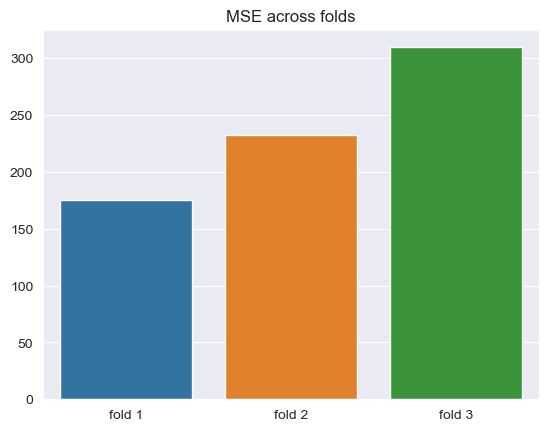

In [6]:
import seaborn as sns

sns.barplot(x=['fold 1','fold 2','fold 3'],y = MSEs).set(title='MSE across folds')

[Text(0.5, 1.0, 'R-squared values across folds')]

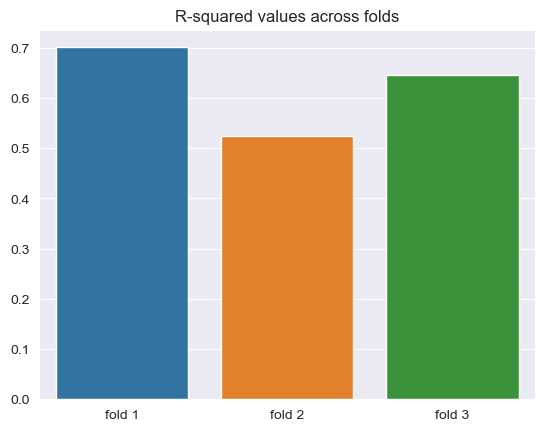

In [7]:
sns.barplot(x=['fold 1','fold 2','fold 3'],y = r2s).set(title='R-squared values across folds')

## Refit regressor on whole data for analysis

In [8]:
regressor.fit(X,y)

LinearRegression()

In [9]:
intercept = regressor.intercept_[0]
speed_coef = regressor.coef_[0][0]
model_score = (regressor.score(X,y)*100)

In [10]:
print("Dependent variable \'speed\' coefficient: {}".format(speed_coef.round(3)))

Dependent variable 'speed' coefficient: 3.932


In [11]:
print("Model intercept: {}".format(intercept.round(3)))

Model intercept: -17.579


In [12]:
print("Model R-squared score: {}%".format(model_score.round(1)))

Model R-squared score: 65.1%


In [13]:
print("Model formula")
print("*"*50)
print("\ny = {} + {} x".format(intercept.round(3),speed_coef.round(3)))

Model formula
**************************************************

y = -17.579 + 3.932 x


# Plotting regression

Create regresion line

In [14]:
regr_x = np.array([0,30]) # range for plot
regr_y = regr_x*speed_coef + intercept # values

regr_x and reg_y variables give 2 points from which the line is plotted:

[0,-17.579] and [30,100.393]

Scatter X and y datapoints and plot them all together

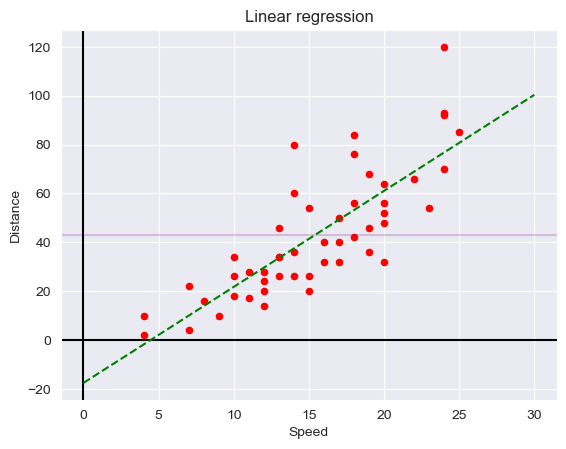

In [15]:
import matplotlib.pyplot as plt


plt.scatter(data=cars, x='speed',y='dist', s=20, c='red')
plt.axhline(color='black')
plt.axvline(color='black')
plt.axhline(np.mean(cars['dist']),color = 'purple', alpha=0.2)
plt.plot(regr_x,regr_y, color='green',  linestyle = 'dashed', label='regression line')
plt.xlabel('Speed')
plt.ylabel('Distance')
plt.title('Linear regression')
plt.savefig('Documents/plots/regression.png')

In [16]:
import statsmodels.api as sm

X = sm.add_constant(X)
regressor = sm.OLS(y,X).fit()

Method: Least Squares; Model fits line so that it minimizes Mean Squared Error of Residuals

RESIDUALS = Distance between real and fitted value, ideally 0

In [17]:
residuals = pd.DataFrame(regressor.resid,columns=['residual'])
residuals.head()

,residual
0,3.849460
1,11.849460
2,-5.947766
3,12.052234
4,2.119825


Difference between real and fitted value for first point is 3.84, for second point 11.84 etc.

<Axes: >

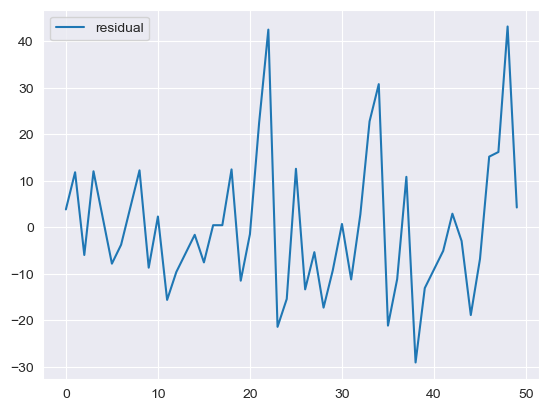

In [18]:
residuals.plot()

Residual values for each point

In [19]:
residuals.describe()

,residual
count,5.000000e+01
mean,7.673862e-15
std,1.522184e+01
min,-2.906908e+01
25%,-9.525321e+00
50%,-2.271854e+00
75%,9.214715e+00
max,4.320128e+01


High variance, residual distribution graph is needed

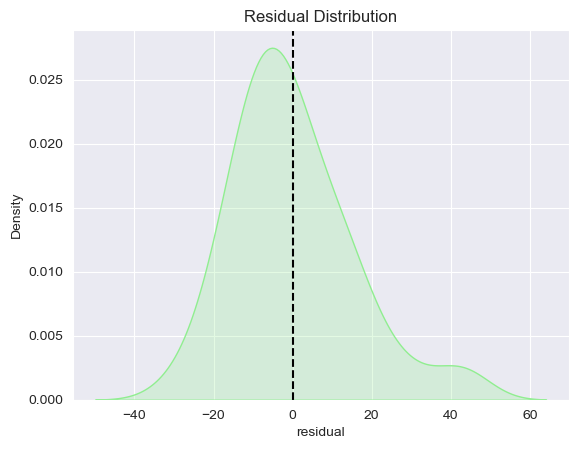

In [20]:
sns.kdeplot(x=residuals['residual'], color='lightgreen', fill=True)
plt.axvline(color='black', linestyle='dashed')
plt.title('Residual Distribution')
plt.savefig('Documents/plots/residual_dist.png')

Residual distribution should be normal and centered around 0

 It implies that the model captures the main patterns and sources of variation in the data

In [21]:
from scipy.stats import skew, kurtosis

print({'skewness': skew(residuals['residual']), 'kurtosis': kurtosis(residuals['residual'])})

{'skewness': 0.8850519391703304, 'kurtosis': 0.8929436722256208}


Residuals are heavily skewed to the right, implying data had too much variation to be captured with simple linear regression

However, right skewness shows the model more frequently predicted Braking Distance at lower value than it actually is (hence the positive residuals)

Regarding the problem of **predicting braking distance**, predicting lower value than real value has worse consequence than predicting braking distance to be larger

***Based on that, model should be rejected for application***

In [22]:
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           1.49e-12
Time:                        15:32:21   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.5791      6.758     -2.601      0.0

## R <sup>2</sup>

Residual sum of squares: RSS is `sum((y_true-y_pred)^2)`

Total sum of squares: TSS is `sum((y_true - mean(y_true))^2)`

R-squared is 1-RSS/TSS 

R squared value 1 of means that all the movements of a  dependent variable are completely explained by movements of independent variable

***R squared value of 0.65 means that Speed variable explains about 65% of variability of Distance variable***

With multiple linear regression, having many independent variables will increase R squared regardless of performance

Adjusted R squared adds penalty to R-squared based on number of independent variables

## F statistic

f-statistics is a statistic used to test the significance of regression coefficients 

Residual degrees of freedom = sample_size - number_of_features - 1 which is 48

Model degrees of freedom = number of features

residual standard error = RSS/(residual_degrees_of_freedom)
Model standard error = TSS/number of features

F statistic = Model standard error/residual standard error = 89.57

H0: there is no relationship between any of the variables
H1: there is a relationship between at least one variable

F-test p value for 89.57 is <0.00000, meaning there is little to no chance that H0 is true, and H0 is rejected

***Therefore, there is a linear relationship between AT LEAST one variable***

## Intercept and coefficient t test

H0: there is no relationship between this variable and dependant variable
H1: there is a relationship between this variable and dependant variable

Standard error = standard deviation of variable/sqrt(sample_size)

t value = coefficient/standard error, degrees of freedom = 48, 2 tails

p value for intercept is 0.012 which means there is 1.2% chance intercept value is random

p value for intercept is < 0.000 which means there little to no chance Speed coefficient value is random

Reject null hypothesis for both

***Therefore, both intercept and Speed coefficient are significant predictors of Distance dependent variable***